In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
from numpy.random import uniform, choice
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from astropy.io.misc.hdf5 import write_table_hdf5

filterwarnings('ignore') 
sns.set_style('white')
np.random.seed(1234)

In [2]:
mu_feats = np.load('../train_data/AllGlobal_Mu_Final.npy')
std_feats = np.load('../train_data/AllGlobal_Std_Final.npy')

In [3]:
dataAge = pd.read_csv('../train_data/AllTrainedNorm.csv')

In [4]:
len(dataAge)

2331

In [5]:
# Get the original features

logg = np.asarray(dataAge['LOGG']).astype('f8')
logg_err = np.asarray(dataAge['LOGG_ERR']).astype('f8')

teff = np.asarray(dataAge['TEFF']).astype('f8')
teff_err = np.asarray(dataAge['TEFF_ERR']).astype('f8')

alpha_m = np.asarray(dataAge['ALPHA_M']).astype('f8')
alpham_err = np.asarray(dataAge['ALPHA_M_ERR']).astype('f8')

mh = np.asarray(dataAge['M_H']).astype('f8')
mh_err = np.asarray(dataAge['M_H_ERR']).astype('f8')

cfe = np.asarray(dataAge['C_FE']).astype('f8')
cfe_err = np.asarray(dataAge['C_FE_ERR']).astype('f8')

nfe = np.asarray(dataAge['N_FE']).astype('f8')
nfe_err = np.asarray(dataAge['N_FE_ERR']).astype('f8')

g_mag = np.asarray(dataAge['G']).astype('f8')
gmag_err = np.asarray(dataAge['G_ERR']).astype('f8')

bp_mag = np.asarray(dataAge['BP']).astype('f8')
bpmag_err = np.asarray(dataAge['BP_ERR']).astype('f8')

rp_mag = np.asarray(dataAge['RP']).astype('f8')
rpmag_err = np.asarray(dataAge['RP_ERR']).astype('f8')

jmag = np.asarray(dataAge['J']).astype('f8')
jmag_err = np.asarray(dataAge['J_ERR']).astype('f8')

hmag = np.asarray(dataAge['H']).astype('f8')
hmag_err = np.asarray(dataAge['H_ERR']).astype('f8')

kmag = np.asarray(dataAge['K']).astype('f8')
kmag_err = np.asarray(dataAge['K_ERR']).astype('f8')

# The two targets that we are interested in: age and distance
age = np.asarray(dataAge['age']).astype('f8')
age_err = np.asarray(dataAge['ageErr']).astype('f8')

logAge = np.asarray(dataAge['logAge']).astype('f8')
logAge_err = np.asarray(dataAge['logAgeErr']).astype('f8')

dist = np.asarray(dataAge['distKpc']).astype('f8')
dist_err = np.asarray(dataAge['distErrKpc']).astype('f8')

logDist = np.asarray(dataAge['logDistKpc']).astype('f8')
logDist_err = np.asarray(dataAge['logDistKpcErr']).astype('f8')

In [6]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(logAge)
kde.evaluate(logAge)

kde_eval = kde.evaluate(logAge)
inverse_prob = 1.0/kde_eval

import math
from math import ceil

intInvProb = list(map( lambda x: ceil(x), inverse_prob))
print(max(intInvProb))

nDAge = intInvProb

print(len(nDAge))

27
2331


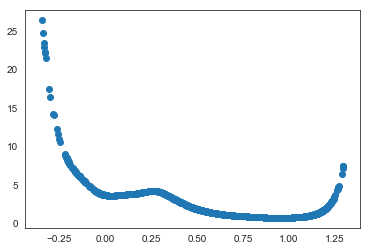

In [7]:
plt.scatter(logAge, inverse_prob)

In [8]:
minLogDist = -3.0
maxLogDist = 1.0

logDist_new = list(map(lambda x: uniform(minLogDist, maxLogDist, size=x), nDAge))
dist_new = list(map(lambda x:10**x, logDist_new))

distmod_new = list(map(lambda x: 5*np.log10(1000*x/10), dist_new))
distmod_orig = list(map(lambda x: 5*np.log10(1000*x/10), dist))
delta = list(map(lambda x, y: x - y, distmod_new, distmod_orig))

loggArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, logg))
teffArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, teff))
alphamArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, alpha_m))
mhArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, mh))
cfeArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, cfe))
nfeArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, nfe))
gArr =  list(map(lambda x, y: x + y, g_mag, delta))
bpArr = list(map(lambda x, y: x + y, bp_mag, delta))
rpArr =  list(map(lambda x, y: x + y, rp_mag, delta))
JArr = list(map(lambda x, y: x + y, jmag, delta))
HArr = list(map(lambda x, y: x + y, hmag, delta))
KArr = list(map(lambda x, y: x + y, kmag, delta))

loggArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, logg_err))
alphamArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, alpham_err))
teffArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, teff_err))
mhArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, mh_err))
cfeArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, cfe_err))
nfeArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, nfe_err))
gArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, gmag_err))
bpArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, bpmag_err))
rpArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, rpmag_err))
JArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, jmag_err))
HArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, hmag_err))
KArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, kmag_err))

ageArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, age))
ageArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, age_err))

logAgeArr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, logAge))
logAgeArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, logAge_err))

loggArr = [item for sublist in loggArr for item in sublist]
teffArr = [item for sublist in teffArr for item in sublist]
alphamArr = [item for sublist in alphamArr for item in sublist]
mhArr = [item for sublist in mhArr for item in sublist]
cfeArr = [item for sublist in cfeArr for item in sublist]
nfeArr = [item for sublist in nfeArr for item in sublist]
gArr = [item for sublist in gArr for item in sublist]
bpArr = [item for sublist in bpArr for item in sublist]
rpArr = [item for sublist in rpArr for item in sublist]
JArr = [item for sublist in JArr for item in sublist]
HArr = [item for sublist in HArr for item in sublist]
KArr = [item for sublist in KArr for item in sublist]

loggArrErr = [item for sublist in loggArrErr for item in sublist]
teffArrErr = [item for sublist in teffArrErr for item in sublist]
alphamArrErr = [item for sublist in alphamArrErr for item in sublist]
mhArrErr = [item for sublist in mhArrErr for item in sublist]
cfeArrErr = [item for sublist in cfeArrErr for item in sublist]
nfeArrErr = [item for sublist in nfeArrErr for item in sublist]
gArrErr = [item for sublist in gArrErr for item in sublist]
bpArrErr = [item for sublist in bpArrErr for item in sublist]
rpArrErr = [item for sublist in rpArrErr for item in sublist]
JArrErr = [item for sublist in JArrErr for item in sublist]
HArrErr = [item for sublist in HArrErr for item in sublist]
KArrErr = [item for sublist in KArrErr for item in sublist]

ageArr = [item for sublist in ageArr for item in sublist]
ageArrErr = [item for sublist in ageArrErr for item in sublist]

logAgeArr = [item for sublist in logAgeArr for item in sublist]
logAgeArrErr = [item for sublist in logAgeArrErr for item in sublist]

distArr = [item for sublist in dist_new for item in sublist]
distArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, dist_err))
distArrErr = [item for sublist in distArrErr for item in sublist]

logDistArr = [item for sublist in logDist_new for item in sublist]
logDistArrErr = list(map(lambda x, y: np.ones_like(x) * y, dist_new, logDist_err))
logDistArrErr = [item for sublist in logDistArrErr for item in sublist]

In [9]:
loggArrNorm = (loggArr - mu_feats[0])/std_feats[0]
loggArrErrNorm = loggArrErr/std_feats[0]

teffArrNorm = (teffArr - mu_feats[1])/std_feats[1]
teffArrErrNorm = teffArrErr/std_feats[1]

alphamArrNorm = (alphamArr - mu_feats[2])/std_feats[2]
alphamArrErrNorm = alphamArrErr/std_feats[2]

mhArrNorm = (mhArr - mu_feats[3])/std_feats[3]
mhArrErrNorm = mhArrErr/std_feats[3]

cfeArrNorm = (cfeArr - mu_feats[4])/std_feats[4]
cfeArrErrNorm = cfeArrErr/std_feats[4]

nfeArrNorm = (nfeArr - mu_feats[5])/std_feats[5]
nfeArrErrNorm = nfeArrErr/std_feats[5]

gArrNorm = (gArr - mu_feats[6])/std_feats[6]
gArrErrNorm = gArrErr/std_feats[6]

bpArrNorm = (bpArr - mu_feats[7])/std_feats[7]
bpArrErrNorm = bpArrErr/std_feats[7]

rpArrNorm = (rpArr - mu_feats[8])/std_feats[8]
rpArrErrNorm = rpArrErr/std_feats[8]

JArrNorm = (JArr - mu_feats[9])/std_feats[9]
JArrErrNorm = JArrErr/std_feats[9]

HArrNorm = (HArr - mu_feats[10])/std_feats[10]
HArrErrNorm = HArrErr/std_feats[10]

KArrNorm = (KArr - mu_feats[11])/std_feats[11]
KArrErrNorm = KArrErr/std_feats[11]

In [10]:
s_table = Table()

# The reshuffled values

s_table['LOGG'] = loggArr
s_table['LOGG_ERR'] = loggArrErr

s_table['TEFF'] = teffArr
s_table['TEFF_ERR'] = teffArrErr

s_table['ALPHA_M'] = alphamArr
s_table['ALPHA_M_ERR'] = alphamArrErr

s_table['M_H'] = mhArr
s_table['M_H_ERR'] = mhArrErr

s_table['C_FE'] = cfeArr
s_table['C_FE_ERR'] = cfeArrErr

s_table['N_FE'] = nfeArr
s_table['N_FE_ERR'] = nfeArrErr

s_table['G'] = gArr
s_table['G_ERR'] = gArrErr

s_table['BP'] = bpArr
s_table['BP_ERR'] = bpArrErr

s_table['RP'] = rpArr
s_table['RP_ERR'] = rpArrErr

s_table['J'] =  JArr
s_table['J_ERR'] = JArrErr

s_table['H'] = HArr
s_table['H_ERR'] = HArrErr

s_table['K'] = KArr
s_table['K_ERR'] = KArrErr

# The normalized values

s_table['LOGG_NORM'] = loggArrNorm
s_table['LOGG_ERR_NORM'] = loggArrErrNorm

s_table['TEFF_NORM'] = teffArrNorm
s_table['TEFF_ERR_NORM'] = teffArrErrNorm

s_table['ALPHA_M_NORM'] = alphamArrNorm
s_table['ALPHA_M_ERR_NORM'] = alphamArrErrNorm

s_table['M_H_NORM'] = mhArrNorm
s_table['M_H_ERR_NORM'] = mhArrErrNorm

s_table['C_FE_NORM'] = cfeArrNorm
s_table['C_FE_ERR_NORM'] = cfeArrErrNorm

s_table['N_FE_NORM'] = nfeArrNorm
s_table['N_FE_ERR_NORM'] = nfeArrErrNorm

s_table['G_NORM'] = gArrNorm
s_table['G_ERR_NORM'] = gArrErrNorm

s_table['BP_NORM'] = bpArrNorm
s_table['BP_ERR_NORM'] = bpArrErrNorm

s_table['RP_NORM'] = rpArrNorm
s_table['RP_ERR_NORM'] = rpArrErrNorm

s_table['J_NORM'] =  JArrNorm
s_table['J_ERR_NORM'] = JArrErrNorm

s_table['H_NORM'] = HArrNorm
s_table['H_ERR_NORM'] = HArrErrNorm

s_table['K_NORM'] = KArrNorm
s_table['K_ERR_NORM'] = KArrErrNorm

# The targets

s_table['age'] = ageArr
s_table['ageErr'] = ageArrErr

s_table['logAge'] = logAgeArr
s_table['logAgeErr'] = logAgeArrErr

s_table['distKpc'] = distArr
s_table['distErrKpc'] = distArrErr

s_table['logDistKpc'] = logDistArr
s_table['logDistKpcErr'] = logDistArrErr

In [11]:
s_table_pd = s_table.to_pandas()

In [12]:
s_table_pd.to_csv('../HBNN_train_data/AllTrainedNormAugShuffled.csv')

In [13]:
len(s_table_pd)

4673

In [14]:
s_table_pd.head()

,LOGG,LOGG_ERR,TEFF,TEFF_ERR,ALPHA_M,ALPHA_M_ERR,M_H,M_H_ERR,C_FE,C_FE_ERR,...,K_NORM,K_ERR_NORM,age,ageErr,logAge,logAgeErr,distKpc,distErrKpc,logDistKpc,logDistKpcErr
0,2.595899,0.039131,4859.09082,77.176064,-0.022834,0.010629,0.171807,0.029292,-0.167251,0.030599,...,-13.753037,0.020098,1.6206,0.1012,0.209676,0.027905,0.005835,0.012522,-2.233922,0.003619
1,2.595899,0.039131,4859.09082,77.176064,-0.022834,0.010629,0.171807,0.029292,-0.167251,0.030599,...,-4.137341,0.020098,1.6206,0.1012,0.209676,0.027905,0.307918,0.012522,-0.511565,0.003619
2,2.595899,0.039131,4859.09082,77.176064,-0.022834,0.010629,0.171807,0.029292,-0.167251,0.030599,...,-8.254842,0.020098,1.6206,0.1012,0.209676,0.027905,0.056352,0.012522,-1.249089,0.003619
3,2.595899,0.039131,4859.09082,77.176064,-0.022834,0.010629,0.171807,0.029292,-0.167251,0.030599,...,-0.491732,0.020098,1.6206,0.1012,0.209676,0.027905,1.384951,0.012522,0.141434,0.003619
4,2.595899,0.039131,4859.09082,77.176064,-0.022834,0.010629,0.171807,0.029292,-0.167251,0.030599,...,-0.611937,0.020098,1.6206,0.1012,0.209676,0.027905,1.317963,0.012522,0.119903,0.003619


In [17]:
NameInput = input("Input name of the dataset > ")
s_table_pd = s_table.to_pandas()
s_table_pd.to_csv('../HBNN_train_data/AllTrainedNormAugShuffled_%s.csv' % str(NameInput))
s_table.write('../HBNN_train_data//AllTrainedNormAugShuffled_%s.fits' % str(NameInput), overwrite=True)
write_table_hdf5(s_table, '../HBNN_train_data//AllTrainedNormAugShuffled_%s.hdf5' % str(NameInput),  path='updated_data', overwrite=True)

Input name of the dataset > A
